<a href="https://colab.research.google.com/github/1772hojaz/alu-ml_tech1-assignment/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Analysis - Group Assignment**
##Group 1 Members:



*   Humphrey Jones Gabarinocheka Nyahoja

*   Samuel Dushime


*   Audry Ashleen Chivanga


*   Jules Gatete








In [2]:
!pip install -q kaggle

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [19]:
# Load dataset; assumes "IMDB Dataset.csv" is uploaded to Colab
df = pd.read_csv("/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [20]:
# Add a new column for review length (in words)
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

In [25]:
# 1. Summary Statistics
num_reviews = df.shape[0]
class_counts = df['sentiment'].value_counts()
avg_length = df['review_length'].mean()
length_stats = df['review_length'].describe()

In [22]:
print("Total reviews:", num_reviews)
print("\nClass distribution:")
print(class_counts)
print("\nAverage review length (in words):", avg_length)
print("\nReview length statistics:")
print(length_stats)

Total reviews: 50000

Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Average review length (in words): 231.15694

Review length statistics:
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


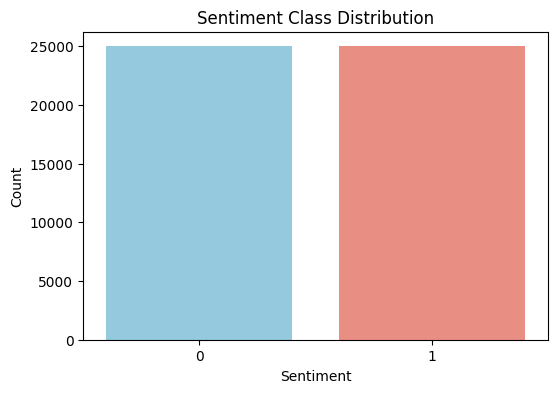

In [28]:
# 2. Class Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette=['skyblue', 'salmon'], legend=False)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

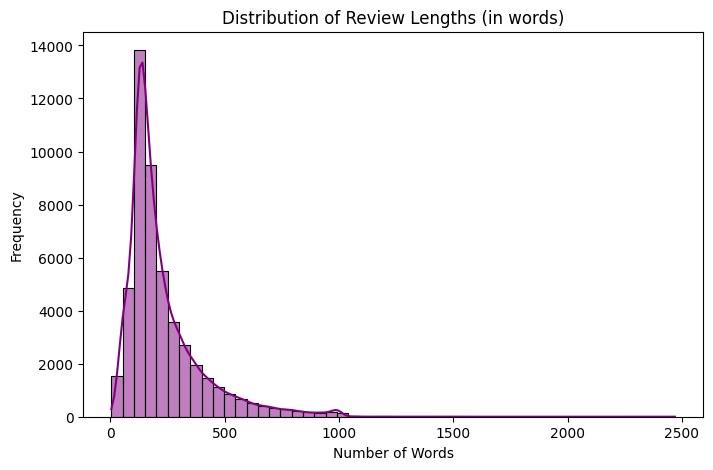

In [29]:
# 3. Review Length Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=50, kde=True, color='purple')
plt.title("Distribution of Review Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

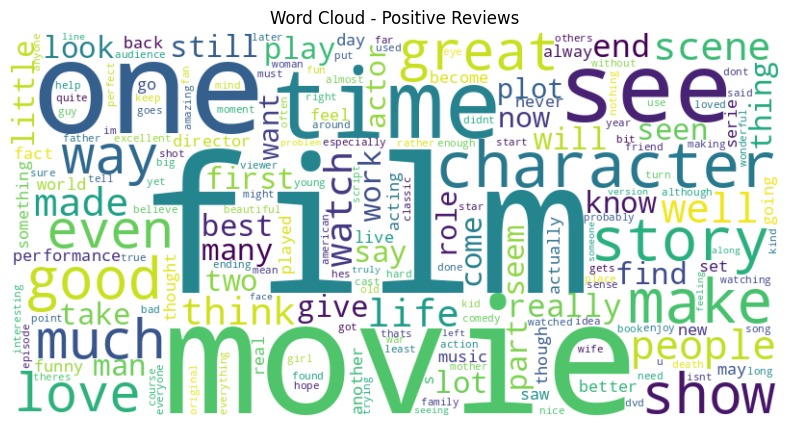

In [32]:
# 4. Word Cloud for Positive Reviews
# Filter for rows where sentiment is 1 (which is now 'positive' after mapping)
positive_text = " ".join(df[df['sentiment'] == 1]['review'])
wordcloud_pos = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()

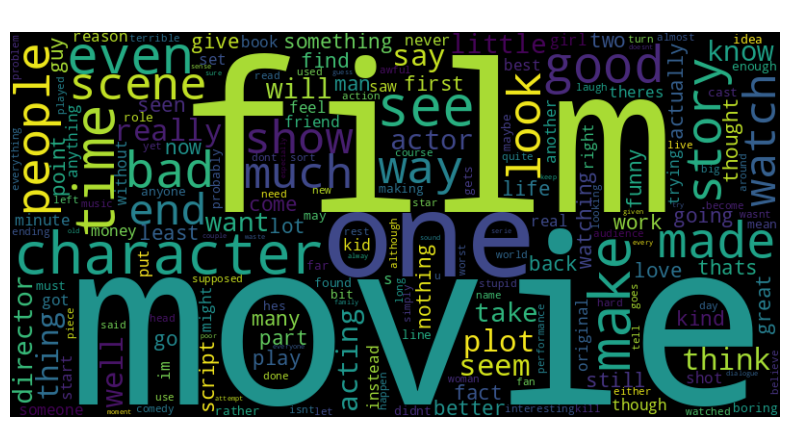

In [35]:
# 5. Word Cloud for Negative Reviews
# Use the numerical label 0 for negative sentiment after mapping
negative_text = " ".join(df[df['sentiment'] == 0]['review'])
wordcloud_neg = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews", color='white')
plt.show()

In [36]:
# 6. Top 20 Most Frequent Words (excluding stopwords) - Overall
all_text = " ".join(df['review'])
wordcloud_all = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(all_text)

# Extract frequencies
frequencies = wordcloud_all.words_
top_20 = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True)[:20])


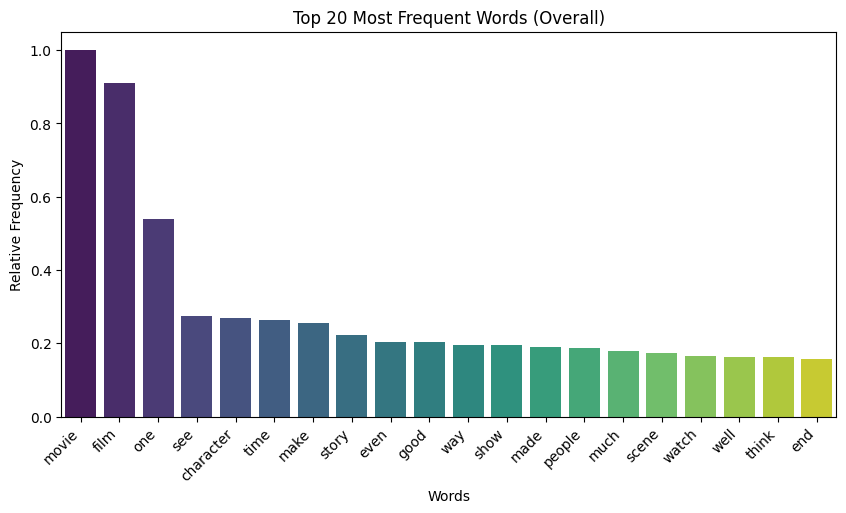

In [38]:
# Display top 20 words as bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_20.keys()), y=list(top_20.values()), hue=list(top_20.keys()), palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Frequent Words (Overall)")
plt.xlabel("Words")
plt.ylabel("Relative Frequency")
plt.show()

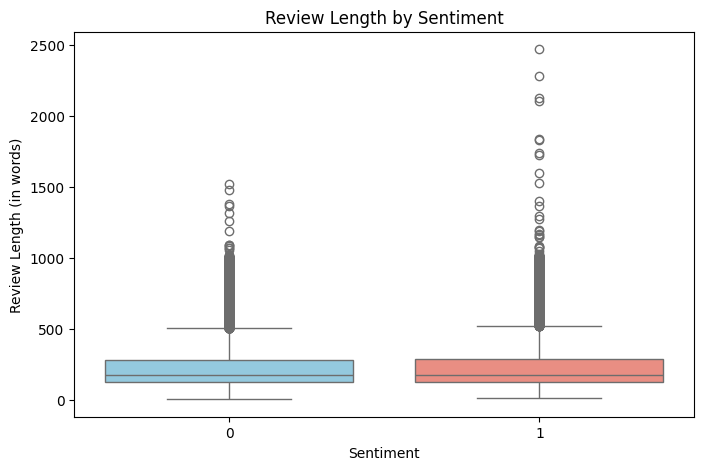

In [40]:
# 7. Review Length vs. Sentiment Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sentiment', y='review_length', hue='sentiment', palette=['skyblue', 'salmon'], legend=False)
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (in words)")
plt.show()

In [41]:
# 8. Display a Few Sample Reviews from Each Class for Context
print("\nSample Positive Reviews:\n", df[df['sentiment'] == 'positive'].head(3)['review'], "\n")
print("Sample Negative Reviews:\n", df[df['sentiment'] == 'negative'].head(3)['review'])


Sample Positive Reviews:
 Series([], Name: review, dtype: object) 

Sample Negative Reviews:
 Series([], Name: review, dtype: object)


In [23]:
# Map sentiment to numbers
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Clean the text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"<.*?>", "", text)  # Remove HTML
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation and numbers
    return text

df['review'] = df['review'].apply(clean_text)

df.head()

,review,sentiment,review_length
0,one of the other reviewers has mentioned that ...,1,307
1,a wonderful little production the filming tech...,1,162
2,i thought this was a wonderful way to spend ti...,1,166
3,basically theres a family where a little boy j...,0,138
4,petter matteis love in the time of money is a ...,1,230
